<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [65]:
function binomial_p(n, k, p)
    factorial(n).*p.^(k).*(1-p).^(n-k)/(factorial(k).*(factorial(n-k)))
end


binomial_p (generic function with 1 method)

In [66]:
binomial_p(10, 2, 0.4)

0.12093235199999999

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [67]:
P_win = binomial_p(10, 5, 0.6)

0.20065812480000006

The chance of losing the bet:

In [68]:
P_lose = 1-P_win

0.7993418751999999

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [15]:
#expected outcome => value*probability 
E_O = P_win.*30+P_lose.*(-10) 

-1.9736750079999963

In [ ]:
Since the expected outcome is negative value, I would expect myself losing money in the game 

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [16]:
P_win2 = binomial_p(10, 4, 0.4)
P_lose2 = 1- P_win2
println("P_win2 = ",P_win2, "\nP_lose2 = ", P_lose2)

P_win2 = 0.250822656
P_lose2 = 0.749177344


In [17]:
E_0_2 = P_win2.*30 + P_lose2.*(-10)

0.03290623999999909

In [ ]:
Since the expected outcome is positive value, I would expect myself earning money in this case

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [94]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [69]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [70]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [71]:
using Polynomials

line_fit =fit(x,y_observed,1)
fit_coeffs = coeffs(line_fit)


2-element Vector{Float64}:
 -2.1693021792078335
  3.175251914318658

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [72]:
function chisqr(b, m, x, y_observed, sigma)
     return sum((y_observed.- (m .* x) .-b).^2/(sigma^2))
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [73]:
chi2_list = []
for i in 1:10000
    noise2 = Random.rand(di.Normal(0,sigma),11)
    y_observed = y_true + noise2
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end


### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [74]:
using Statistics
DF = mean(chi2_list)

9.007768764402904

Degree of freedom = N - P 
N = total # of data points  = 11
P = the number of different parameters = 2
DF = 9 
Therefore,the mean value (degree of freedom) makes sense.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [75]:
#1
chi2_di = di.Chisq(DF)
#2
x_dist = 0:0.1:30
#3
pdf_chi2 = di.pdf.(chi2_di,x_dist) 

301-element Vector{Float64}:
 0.0
 1.1235917779868153e-6
 1.212461979465052e-5
 4.7748179427041154e-5
 0.00012445518107422662
 0.0002587377147329534
 0.00046621575453799385
 0.0007611075530626484
 0.0011559216154759036
 0.0016612928098823237
 0.002285916791881732
 0.00303655307797979
 0.003918076407915635
 ⋮
 0.00026270572096790117
 0.0002529363089191122
 0.00024352005235868103
 0.0002344446411188845
 0.00022569817359301993
 0.0002172691441068753
 0.00020914643063768475
 0.00020131928287306554
 0.00019377731060245287
 0.00018651047243364773
 0.0001795090648271397
 0.00017276371144094678

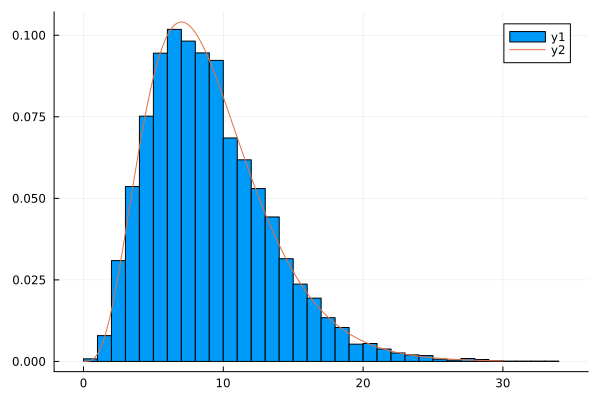

In [76]:
using Plots
#4
histogram(chi2_list, bin=50, normalize=true)
#5
plot!(x_dist,pdf_chi2)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [77]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [78]:
m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

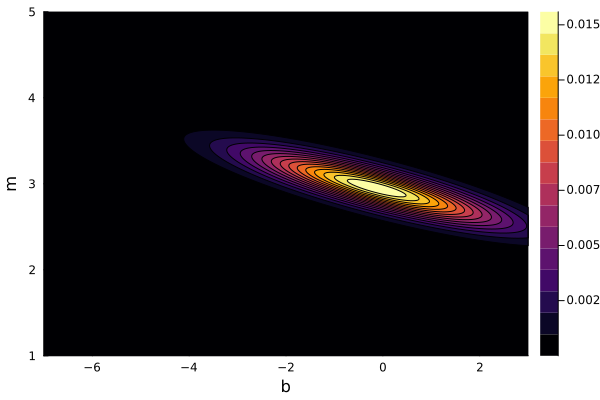

In [79]:
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

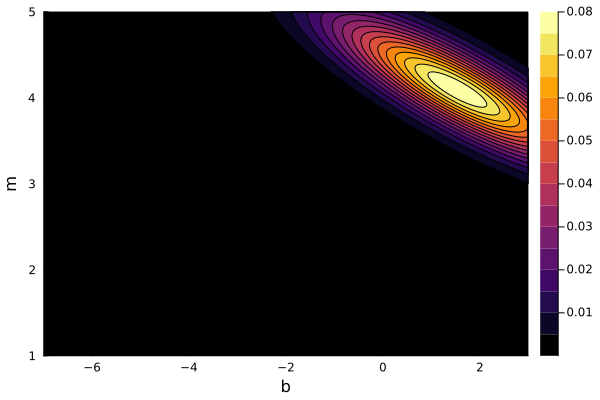

In [88]:
x = 0:0.5:5 
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This plot is vertically wider than a plot with a range of 2.6 because the range of x is smaller

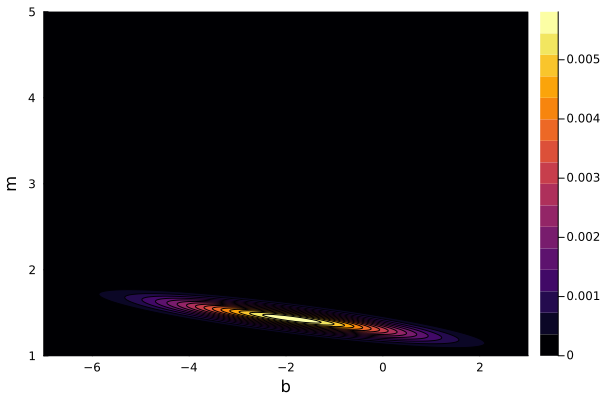

In [83]:
x = 0:2:20 
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This plot is vertically thinner and horizontally wider becasue the range of x is greater. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

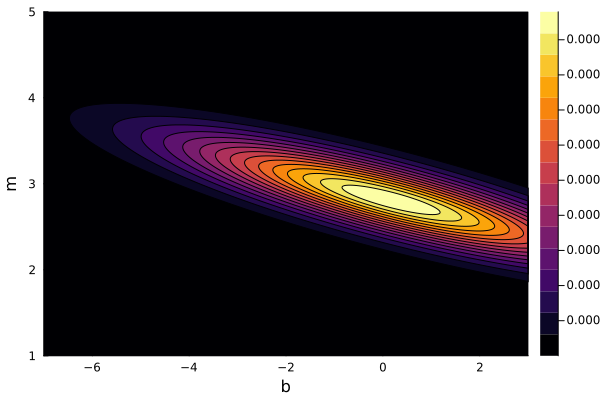

In [59]:
x = 0:1:10
sigma = 5 
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")


This plot is both horizontally and vertically wider becasue the sigma value is greater .  


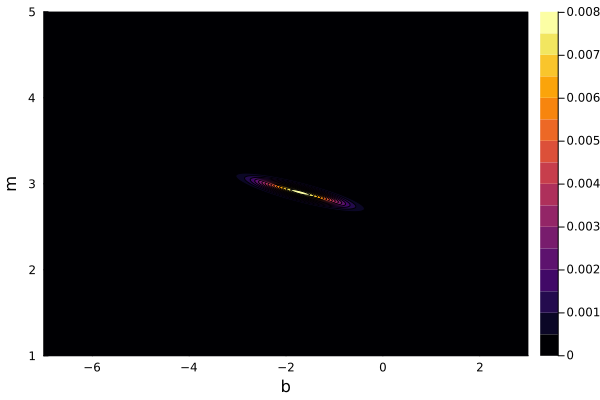

In [60]:
x = 0:1:10
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")


This plot is both horizontally and vertically thinner because the sigma value is smaller. 